# Clayton Seabaugh: Midterm Project
**Author:** Clayton Seabaugh  
**Date:** 3-6-2025  
**Objective:** This project demonstrates my ability to apply classification modeling techniques to a real-world dataset. 

## Section 1: Import and Inspect the Data

### Section 1.1 Import modules and inspect first 10 rows

In [39]:
# Imports needed
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables) 


{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [40]:
# Create file path for data and print head
file_path = 'data\data_banknote_authentication.txt'
if os.path.exists(file_path):
    # Read and print df
    df = pd.read_csv(file_path)
    print(df.head(10))
else:
    print(f"File {file_path} does not exist.")



   variance  skewness  curtiosis  entropy  class
0   3.62160    8.6661   -2.80730 -0.44699      0
1   4.54590    8.1674   -2.45860 -1.46210      0
2   3.86600   -2.6383    1.92420  0.10645      0
3   3.45660    9.5228   -4.01120 -3.59440      0
4   0.32924   -4.4552    4.57180 -0.98880      0
5   4.36840    9.6718   -3.96060 -3.16250      0
6   3.59120    3.0129    0.72888  0.56421      0
7   2.09220   -6.8100    8.46360 -0.60216      0
8   3.20320    5.7588   -0.75345 -0.61251      0
9   1.53560    9.1772   -2.27180 -0.73535      0


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\clayt\AppData\Local\Temp\ipykernel_15808\722488926.py:2: SyntaxWarning: invalid escape sequence '\d'
  file_path = 'data\data_banknote_authentication.txt'


### Section 1.2 Check for missing values and display summary statitistics

In [41]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values in each Column:\n{missing_values}")

# Generate summary statistics
summary_stats = df.describe()
print (f"Summary Statistics:\n{summary_stats}")

Missing Values in each Column:
variance     0
skewness     0
curtiosis    0
entropy      0
class        0
dtype: int64
Summary Statistics:
          variance     skewness    curtiosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


### Reflection 1:
- What do you notice about the dataset? Are there any data issues? I notice that there are no null values and that the dataset is primarily float numbers except class which are integers. I can see it is a rather large dataset with 1372 rows. 

## Section 2: Data Exploration and Preparation

### Section 2.1 Explore data patterns and distributions

<function matplotlib.pyplot.show(close=None, block=None)>

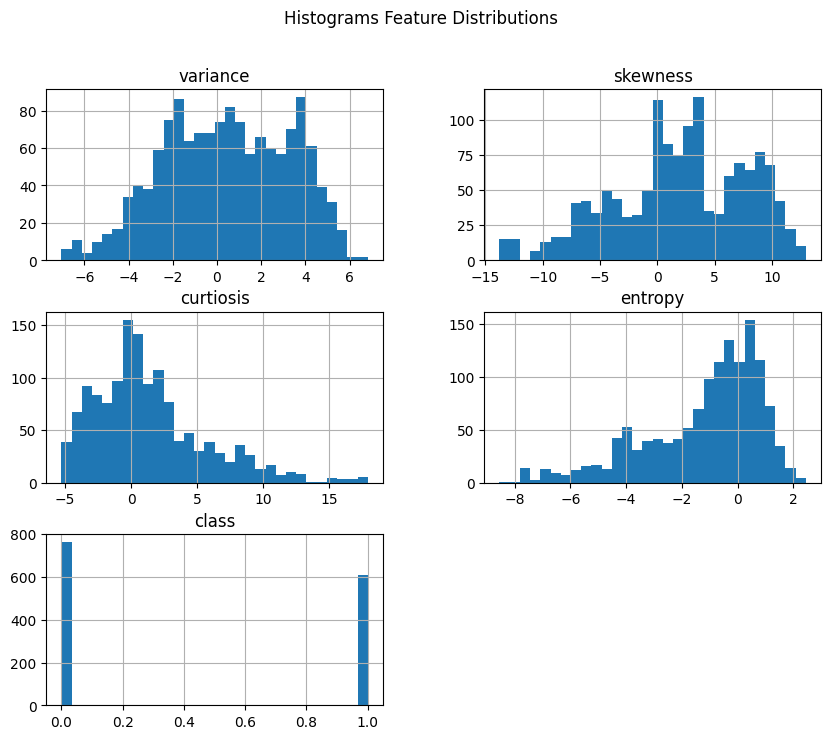

In [42]:
# Create a Histo visualization feature distributions
df.hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms Feature Distributions')
plt.show

In [ ]:
# Create a box plot to show outlier

### Section 2.2 Handle missing values and clean data

### Section 2.3 Features selection and engineering